Here we have air pollution data for the city of Skopje.
The measurements go back ~10 years and include 6 measuring stations. They are taken every hour but there is a lot of missing data and some station are active just since the last few years.
Higher ratings mean worse air quality.
Anything over 50 is considered not good. Anything over 200 is considered hazardous.

Let's try to answer the following questions for the last 5 winters, a winter being the period from November including February. We are looking at the years 2013/14 until 2017/18.
- Which have been the top 3 worst months overall?
- Which measuring station has the highest ratings on average?
- Make a pie chart with the average rating for each station
- Which is the worst month per measuring station on average? Is it the same for them all?
- Make a horizontal bar chart showing how many days in total the measurements have been over 50 for each.Same chart for over 200.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Read in the data
df = pd.read_csv('pm10_data.csv')

# Plot style
plt.style.use('fivethirtyeight')

In [3]:
#Remove the hour from the time so we can groupby date
df['time'] = df['time'].str.replace('\s(.*)', '')

In [4]:
# Get the mean for each day by grouping the 24 daily measurements together
df = df.groupby('time').mean()

In [5]:
# Create DF's for each winter
w1314 = df['2013-11-01':'2014-02-28']
w1415 = df['2014-11-01':'2015-02-28']
w1516 = df['2015-11-01':'2016-02-28']
w1617 = df['2016-11-01':'2017-02-28']
w1718 = df['2017-11-01':'2018-02-28']

In [6]:
# Create DF's of each month's mean
Nov13 = df['2013-11-01':'2013-11-30'].mean()
Nov14 = df['2014-11-01':'2014-11-30'].mean()
Nov15 = df['2015-11-01':'2015-11-30'].mean()
Nov16 = df['2016-11-01':'2016-11-30'].mean()
Nov17 = df['2017-11-01':'2017-11-30'].mean()

Dec13 = df['2013-12-01':'2013-12-31'].mean()
Dec14 = df['2014-12-01':'2014-12-31'].mean()
Dec15 = df['2015-12-01':'2015-12-31'].mean()
Dec16 = df['2016-12-01':'2016-12-31'].mean()
Dec17 = df['2017-12-01':'2017-12-31'].mean()

Jan14 = df['2014-01-01':'2014-01-31'].mean()
Jan15 = df['2015-01-01':'2015-01-31'].mean()
Jan16 = df['2016-01-01':'2016-01-31'].mean()
Jan17 = df['2017-01-01':'2017-01-31'].mean()
Jan18 = df['2013-01-01':'2018-01-31'].mean()

Feb14 = df['2014-02-01':'2014-02-28'].mean()
Feb15 = df['2015-02-01':'2015-02-28'].mean()
Feb16 = df['2016-02-01':'2016-02-28'].mean()
Feb17 = df['2017-02-01':'2017-02-28'].mean()
Feb18 = df['2013-02-01':'2018-02-28'].mean()

In [7]:
# Create DF's for each month and get the mean toral of all measuring stations
Nov13m = df['2013-11-01':'2013-11-30'].mean().mean()
Nov14m = df['2014-11-01':'2014-11-30'].mean().mean()
Nov15m = df['2015-11-01':'2015-11-30'].mean().mean()
Nov16m = df['2016-11-01':'2016-11-30'].mean().mean()
Nov17m = df['2017-11-01':'2017-11-30'].mean().mean()

Dec13m = df['2013-12-01':'2013-12-31'].mean().mean()
Dec14m = df['2014-12-01':'2014-12-31'].mean().mean()
Dec15m = df['2015-12-01':'2015-12-31'].mean().mean()
Dec16m = df['2016-12-01':'2016-12-31'].mean().mean()
Dec17m = df['2017-12-01':'2017-12-31'].mean().mean()

Jan14m = df['2014-01-01':'2014-01-31'].mean().mean()
Jan15m = df['2015-01-01':'2015-01-31'].mean().mean()
Jan16m = df['2016-01-01':'2016-01-31'].mean().mean()
Jan17m = df['2017-01-01':'2017-01-31'].mean().mean()
Jan18m = df['2013-01-01':'2018-01-31'].mean().mean()

Feb14m = df['2014-02-01':'2014-02-28'].mean().mean()
Feb15m = df['2015-02-01':'2015-02-28'].mean().mean()
Feb16m = df['2016-02-01':'2016-02-28'].mean().mean()
Feb17m = df['2017-02-01':'2017-02-28'].mean().mean()
Feb18m = df['2013-02-01':'2018-02-28'].mean().mean()

In [8]:
# Combine all winters into one DF and all months into another
all_winters = pd.concat([w1314, w1415, w1516, w1617, w1718])
all_months = pd.concat([Nov13, Nov14, Nov15, Nov16, Nov17, Dec13, Dec14, Dec15, Dec16, Dec17,
                       Jan14, Jan15, Jan16, Jan17, Jan18, Feb14, Feb15, Feb16, Feb17, Feb18])

In [26]:
# A list with mean data per month to create a series
month_values_mean = [Nov13m, Nov14m, Nov15m, Nov16m, Nov17m, Dec13m, Dec14m, Dec15m, Dec16m, Dec17m,
                       Jan14m, Jan15m, Jan16m, Jan17m, Jan18m, Feb14m, Feb15m, Feb16m, Feb17m, Feb18m]
month_labels = ['Nov13', 'Nov14', 'Nov15', 'Nov16', 'Nov17', 'Dec13', 'Dec14', 'Dec15', 'Dec16', 'Dec17',
                       'Jan14', 'Jan15', 'Jan16', 'Jan17', 'Jan18', 'Feb14', 'Feb15', 'Feb16', 'Feb17', 'Feb18']

In [27]:
# Creating a series of the means per month
months_mean_total = pd.Series(month_values_mean, index=month_labels)

**Exercise 1:**
Which have been the top 3 worst months overall?

In [28]:
months_mean_total.nlargest(3)

Dec13    204.550607
Jan17    175.080966
Jan15    163.921832
dtype: float64

**Exercise 2:** Which measuring station has the highest ratings on average?

In [29]:
station = all_winters.mean().idxmax()
value = all_winters.mean().max()

In [30]:
print(f'The station with the highest average is station {station} with an average of {round(value, 2)}')

The station with the highest average is station D with an average of 157.91


**Exercise 3:** Make a pie chart with the average rating for each station

In [31]:
averages = all_winters.mean()

In [32]:
labels = averages.index

In [33]:
# To return a value insted of the percentage we use a calculation. 'autopct' must return a function.
def abs_values(val):
    a = round((sum(averages) / 100) * val, 2)
    return a

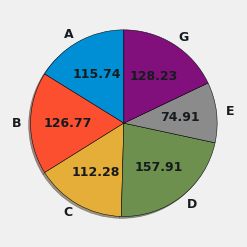

In [34]:
plt.pie(averages, labels=labels,shadow=True, startangle=90, autopct=abs_values,
        wedgeprops={'edgecolor': 'black'}, textprops={'color': '#161b1e', 'size': 12.5, 'weight': 'bold'}) 
plt.show()

**Exercise 4:** Which is the worst month per measuring station on average? Is it the same for them all?

In [49]:
# Combine the montly measurements into a month total DF 
Nov = pd.DataFrame([Nov13, Nov14, Nov15, Nov16, Nov17], index=['Nov13', 'Nov14', 'Nov15', 'Nov16', 'Nov17'])
Dec = pd.DataFrame([Dec13, Dec14, Dec15, Dec16, Dec17], index=['Dec13', 'Dec14', 'Dec15', 'Dec16', 'Dec17'])
Jan = pd.DataFrame([Jan14, Jan15, Jan16, Jan17, Jan18], index=['Jan14', 'Jan15', 'Jan16', 'Jan17', 'Jan18'])
Feb = pd.DataFrame([Feb14, Feb15, Feb16, Feb17, Feb18], index=['Feb14', 'Feb15', 'Feb16', 'Feb17', 'Feb18'])

In [59]:
# Get the mean on the month basis
n = Nov.mean()
d = Dec.mean()
j = Jan.mean()
f = Feb.mean()

In [61]:
# Create a DF from it
months = pd.concat([n, d, j, f], axis=1, keys=['Nov', 'Dec', 'Jan', 'Feb'])

In [63]:
# Transpose the data so idxmax returns the right index
months = months.T

In [64]:
# Pulling the worst month per station
a = months['A'].idxmax()
b = months['B'].idxmax()
c = months['C'].idxmax()
d = months['D'].idxmax()
e = months['E'].idxmax()
g = months['G'].idxmax()

In [65]:
print(f' The worst months per station are:\n A: {a}\n B: {b}\n C: {c}\n D: {d}\n E: {e}\n G: {g}')

 The worst months per station are:
 A: Dec
 B: Jan
 C: Dec
 D: Dec
 E: Jan
 G: Dec


**Exercise 5:** Make a horizontal bar chart showing how many days in total the measurements have been over 50 for each. 
Same chart for over 200.

In [73]:
# Create a frequency table to plot the chart with
count50 = {}
count200 = {}
count_total = 0

station = ['A', 'B', 'C', 'D', 'E', 'G']
for c in station:
    for n in all_winters[c]:
        count_total += 1 / len(station)
        if n>= 50 and n < 200:
            if c in count50:
                count50[c] += 1
            else:
                count50[c] = 1
        elif n>= 200:
            if c in count200:
                count200[c] += 1
            else:
                count200[c] = 1

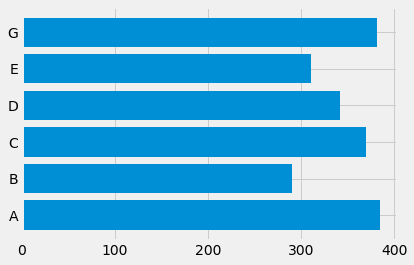

In [67]:
# Plot horizontal count 50 bar
plt.barh(*zip(*count50.items()))
plt.show()

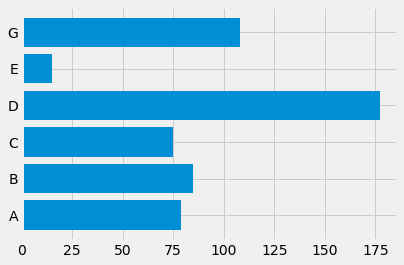

In [68]:
# Plot horizontal count 200 bar
plt.barh(*zip(*count200.items()))
plt.show()